In [111]:
import numpy as np
import pandas as pd
import math
import random
import time
import os
import sys
from scipy.spatial import distance
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline

Prototipos de clase (centroides):
 [[ 0.00179161  0.02482183  0.01565443  0.0050547   0.00210156  0.00284199
   0.00301291  0.0111142   0.01513892  0.03656409  0.0114302 ]
 [ 0.00663455  0.01139448  0.01404271  0.01135827  0.00517955  0.00714906
   0.00793895  0.01166618  0.01380854  0.00728833  0.00253096]
 [ 0.01837031  0.00637637  0.01301257  0.01338474  0.018617    0.01883707
   0.01848315  0.01088224  0.01364191  0.00403525  0.001071  ]]


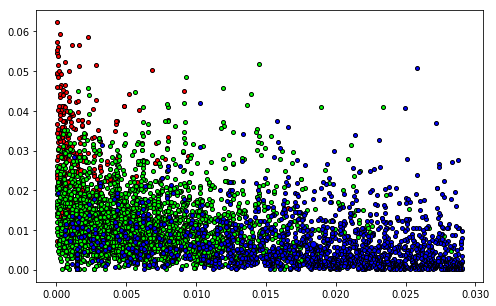

In [140]:
numericalDF = pd.read_csv('numericalData.csv')
columnas = ['directores','criticas','duracion','genero','actores1','actores2','actores3','rostros',
            'scores','gross','budget']
del numericalDF['Unnamed: 0']

for i in columnas:
    numericalDF.loc[numericalDF[i] == 0, i] = numericalDF[i].mean()
numericalDF.head()

test_point = numericalDF.head(300).values
train_set = numericalDF.tail(len(numericalDF)-300).values
#print("Datos de entrenaiento: \n{}\n\nDato de prueba:\n{}\n".format(train_set, test_point))


from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline

num_clusters = 3
k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
k_means.fit(train_set) 
print("Prototipos de clase (centroides):\n", k_means.cluster_centers_)

fig = plt.figure(figsize=(8, 5))
colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff', '#ffff00', '#f6ff00', 
              '#2f800f', '#a221b5', '#21b5ac', '#b1216c']
for k in range(num_clusters):
    my_members = k_means.labels_ == k
    plt.plot(train_set[my_members, 0], train_set[my_members, 1], 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=4)
    plt.plot(k_means.cluster_centers_[k][0], k_means.cluster_centers_[k][1], 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=6)

plt.show()